In [1]:
# En este notebook se trata de clasificar opiniones de apps, positiva, negativa o neutra

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import tensorflow as tf
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.layers import TextVectorization
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Curso Tensorflow 2.0/datasets/googleplaystore_user_reviews.csv")

In [5]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [10]:
data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


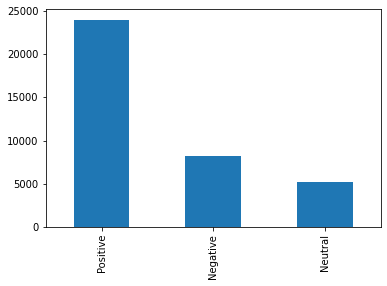

In [11]:
data["Sentiment"].value_counts().plot(kind="bar")

In [12]:
data = data[["Translated_Review","Sentiment"]]

In [13]:
data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [14]:
# Se procesa el texto de forma que no haya números, espacios en blanco consecutivos, en minúscula y sin stopwords
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]',' ', sen)

    sentence = re.sub(r"s+[a-zA-Z]\s+", " ", sentence)

    sentence = re.sub(r"\s+", " ", sentence)

    sentence = sentence.lower()

    words = sentence.split()
    filtered_words = [word for word in words if word not in stopwords.words("english")]

    return " ".join(filtered_words)


In [15]:
data["Translated_Review"] = data["Translated_Review"].apply(lambda sen: preprocess_text(sen))
data

,Translated_Review,Sentiment
0,like eat delicious food cooking food ca foods ...,Positive
1,help eating healthy exerci regular basis,Positive
3,works great especially going grocery store,Positive
4,idea us,Positive
5,way,Positive
...,...,...
64222,mo ads older many agents much owner posted det...,Positive
64223,photos posted portal load fit purpo sure stora...,Positive
64226,dumb app wanted po property rent give option w...,Negative
64227,property busine got link sms happy performance...,Positive


In [16]:
labelencoder = LabelEncoder()
data["Sentiment_label"] = labelencoder.fit_transform(data["Sentiment"])
data

,Translated_Review,Sentiment,Sentiment_label
0,like eat delicious food cooking food ca foods ...,Positive,2
1,help eating healthy exerci regular basis,Positive,2
3,works great especially going grocery store,Positive,2
4,idea us,Positive,2
5,way,Positive,2
...,...,...,...
64222,mo ads older many agents much owner posted det...,Positive,2
64223,photos posted portal load fit purpo sure stora...,Positive,2
64226,dumb app wanted po property rent give option w...,Negative,0
64227,property busine got link sms happy performance...,Positive,2


In [17]:
data.drop(["Sentiment"], axis=1, inplace=True)

In [18]:
X = data.iloc[:,0]
Y = data.iloc[:,1:3]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
number_of_words = 20000
max_len = 50

tokenizer = Tokenizer(num_words=number_of_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [21]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [22]:
vocabulary_size = number_of_words
embedding_size = 128

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocabulary_size, embedding_size, input_shape=(X_train.shape[1], )))
model.add(tf.keras.layers.LSTM(units=128, activation="tanh"))
model.add(tf.keras.layers.Dense(units=np.unique(y_train.shape[0]), activation="sigmoid"))
model.compile(optimizer="rmsprop", loss = "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 29941)             3862389   
                                                                 
Total params: 6,553,973
Trainable params: 6,553,973
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs = 15, batch_size=128)

Epoch 1/15
234/234 [==============================] - 10s 14ms/step - loss: 1.4236 - sparse_categorical_accuracy: 0.6382
Epoch 2/15
234/234 [==============================] - 3s 13ms/step - loss: 0.6627 - sparse_categorical_accuracy: 0.7077
Epoch 3/15
234/234 [==============================] - 3s 13ms/step - loss: 0.4538 - sparse_categorical_accuracy: 0.8201
Epoch 4/15
234/234 [==============================] - 3s 15ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8922
Epoch 5/15
234/234 [==============================] - 3s 14ms/step - loss: 0.2507 - sparse_categorical_accuracy: 0.9187
Epoch 6/15
234/234 [==============================] - 3s 13ms/step - loss: 0.2141 - sparse_categorical_accuracy: 0.9307
Epoch 7/15
234/234 [==============================] - 3s 13ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9413
Epoch 8/15
234/234 [==============================] - 3s 14ms/step - loss: 0.1705 - sparse_categorical_accuracy: 0.9474
Epoch 9/15
234/234 [===================

In [25]:
test_loss, test_acurracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_acurracy))

234/234 [==============================] - 3s 8ms/step - loss: 0.3365 - sparse_categorical_accuracy: 0.8999
Test accuracy: 0.8999465703964233
